In [1]:
%matplotlib inline

In [2]:
# from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import pandas as pd
import talib
import yfinance as yf

/Users/r.orac/envs/r/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
plt.rcParams['figure.facecolor'] = 'w'

In [4]:
df = yf.download("TSLA", start="2018-11-01", end="2020-10-18", interval="1d")
df.shape

[*********************100%***********************]  1 of 1 completed


(494, 6)

In [5]:
t = yf.Ticker("T")

t.dividends

Date
1984-03-26    0.11667
1984-06-25    0.11667
1984-09-24    0.11667
1985-01-04    0.11667
1985-04-03    0.12500
               ...   
2019-10-09    0.51000
2020-01-09    0.52000
2020-04-08    0.52000
2020-07-09    0.52000
2020-10-08    0.52000
Name: Dividends, Length: 148, dtype: float64

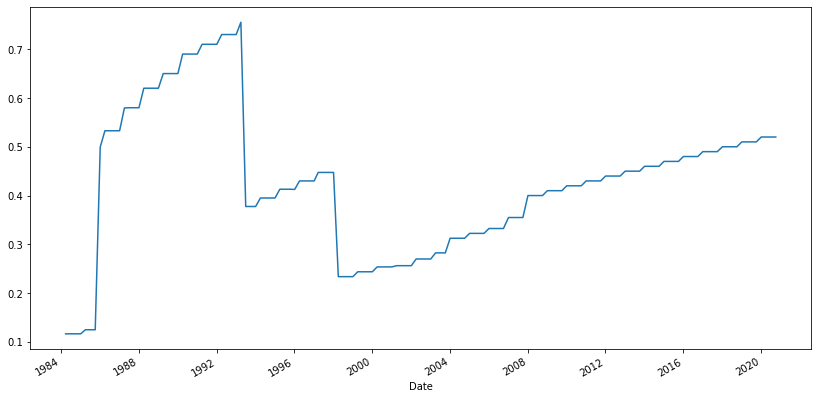

In [6]:
t.dividends.plot(figsize=(14, 7))

In [7]:
df.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2018-10-31  66.508003  68.400002  65.820000  67.463997  67.463997  38121500
2018-11-01  67.652000  69.568001  66.945999  68.856003  68.856003  40000500
2018-11-02  68.748001  69.839996  68.181999  69.281998  69.281998  39040000
2018-11-05  68.099998  68.792000  66.028000  68.279999  68.279999  39155000
2018-11-06  67.814003  69.760002  67.218002  68.211998  68.211998  33814500

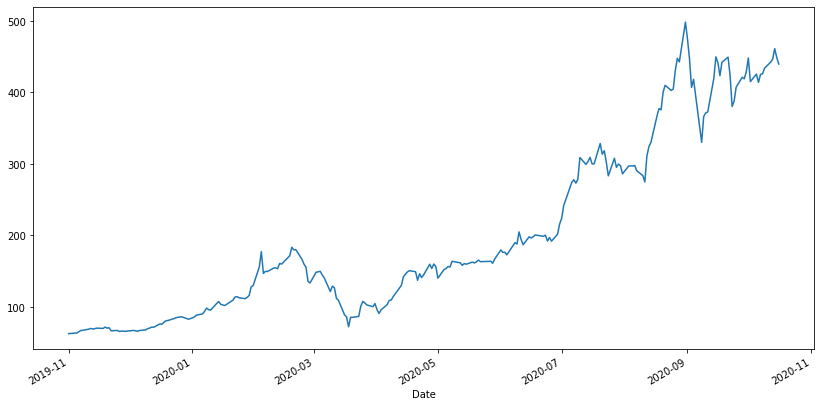

In [8]:
df[df.index >= "2019-11-01"].Close.plot(figsize=(14, 7))

In [9]:
df.loc[:, 'ma20'] = df.Close.rolling(20).mean()
df.loc[:, 'ma200'] = df.Close.rolling(200).mean()

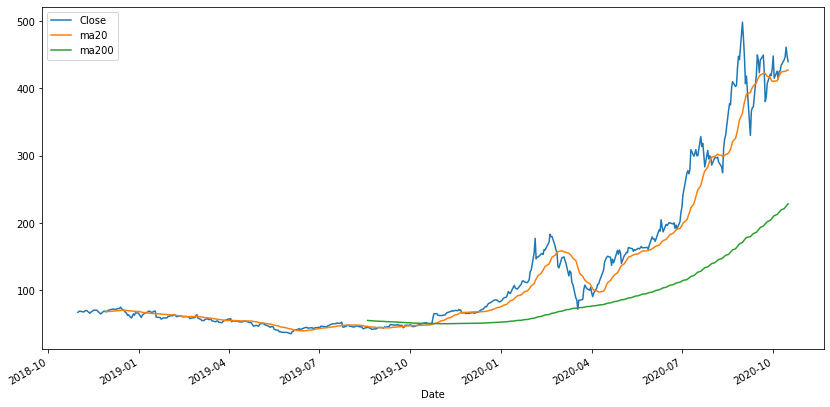

In [10]:
df[["Close", "ma20", "ma200"]].plot(figsize=(14, 7))

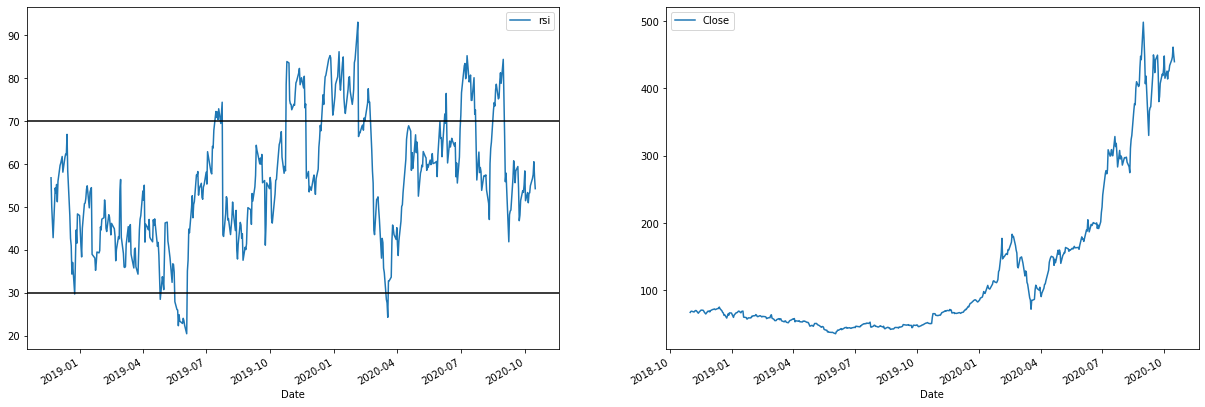

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))


ax0 = df[["rsi"]].plot(ax=ax[0])
ax0.axhline(30, color="black")
ax0.axhline(70, color="black")

df[["Close"]].plot(ax=ax[1])

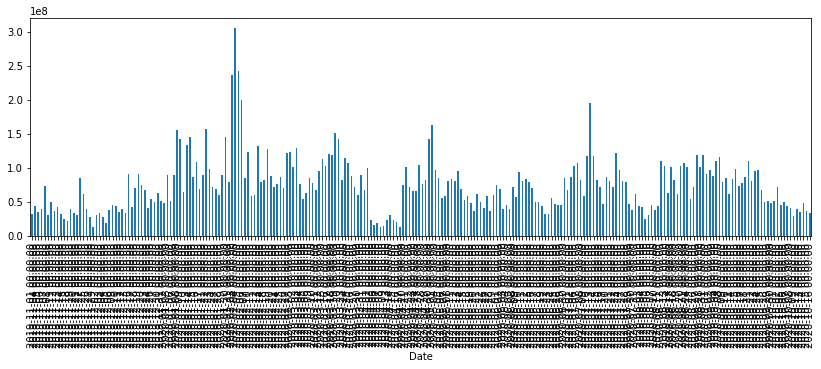

In [13]:
df[df.index >= "2019-11-01"].Volume.plot(kind="bar", figsize=(14, 4))

In [14]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-10-31   66.508003   68.400002   65.820000   67.463997   67.463997   
2018-11-01   67.652000   69.568001   66.945999   68.856003   68.856003   
2018-11-02   68.748001   69.839996   68.181999   69.281998   69.281998   
2018-11-05   68.099998   68.792000   66.028000   68.279999   68.279999   
2018-11-06   67.814003   69.760002   67.218002   68.211998   68.211998   
...                ...         ...         ...         ...         ...   
2020-10-12  442.000000  448.739990  438.579987  442.299988  442.299988   
2020-10-13  443.350006  448.890015  436.600006  446.649994  446.649994   
2020-10-14  449.779999  465.899994  447.350006  461.299988  461.299988   
2020-10-15  450.309998  456.570007  442.500000  448.880005  448.880005   
2020-10-16  454.440002  455.950012  438.850006  439.670013  439.670013   

              Volume        ma20       ma200        rsi  
Date                                                     
2018-10-31  38121500         NaN         NaN        NaN  
2018-11-01  40000500         NaN         NaN        NaN  
2018-11-02  39040000         NaN         NaN        NaN  
2018-11-05  39155000         NaN         NaN        NaN  
2018-11-06  33814500         NaN         NaN        NaN  
...              ...         ...         ...        ...  
2020-10-12  38791100  425.296002  221.437499  56.647423  
2020-10-13  34463700  425.140501  223.240369  57.552823  
2020-10-14  48045400  426.117500  225.132169  60.541625  
2020-10-15  35672400  427.390001  226.958239  56.884732  
2020-10-16  32620000  427.266002  228.726329  54.267047  

[494 rows x 9 columns]

In [15]:
#import plotly.offline as pyo

# Set notebook mode to work in offline
#pyo.init_notebook_mode()

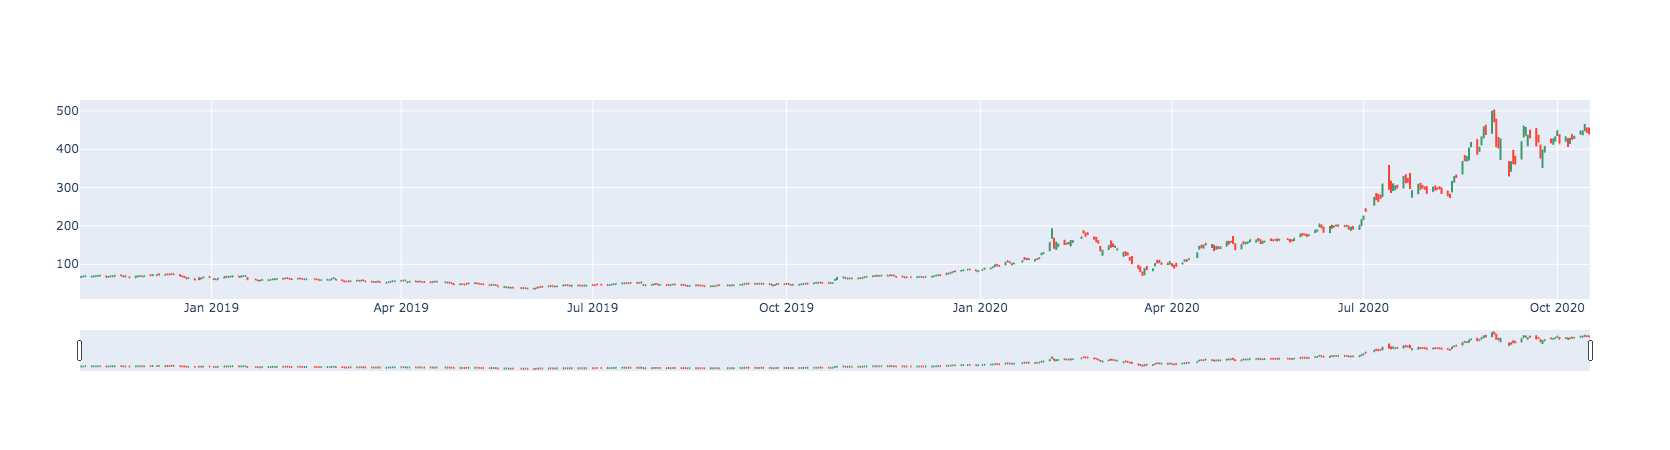

In [16]:
import plotly.graph_objects as go

fig = go.Figure(
    data=go.Ohlc(
        x=df.index,
        open=df["Open"],
        high=df["High"],
        low=df["Low"],
        close=df["Close"],
    )
)
fig.show()